In [1]:
# Importation des biblioth√®ques n√©cessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, pairwise_distances
from scipy.spatial.distance import pdist


In [2]:
# Charger les donn√©es
# Remplacez "path_to_data" par le chemin de votre fichier
data = pd.read_csv("/content/canada_data.csv")

# Filtrer les features cibles
features = data[['valence_intensity', 'fear_intensity', 'anger_intensity',
                 'happiness_intensity', 'sadness_intensity']]


In [3]:
features = features.sample(n=5000, random_state=42)


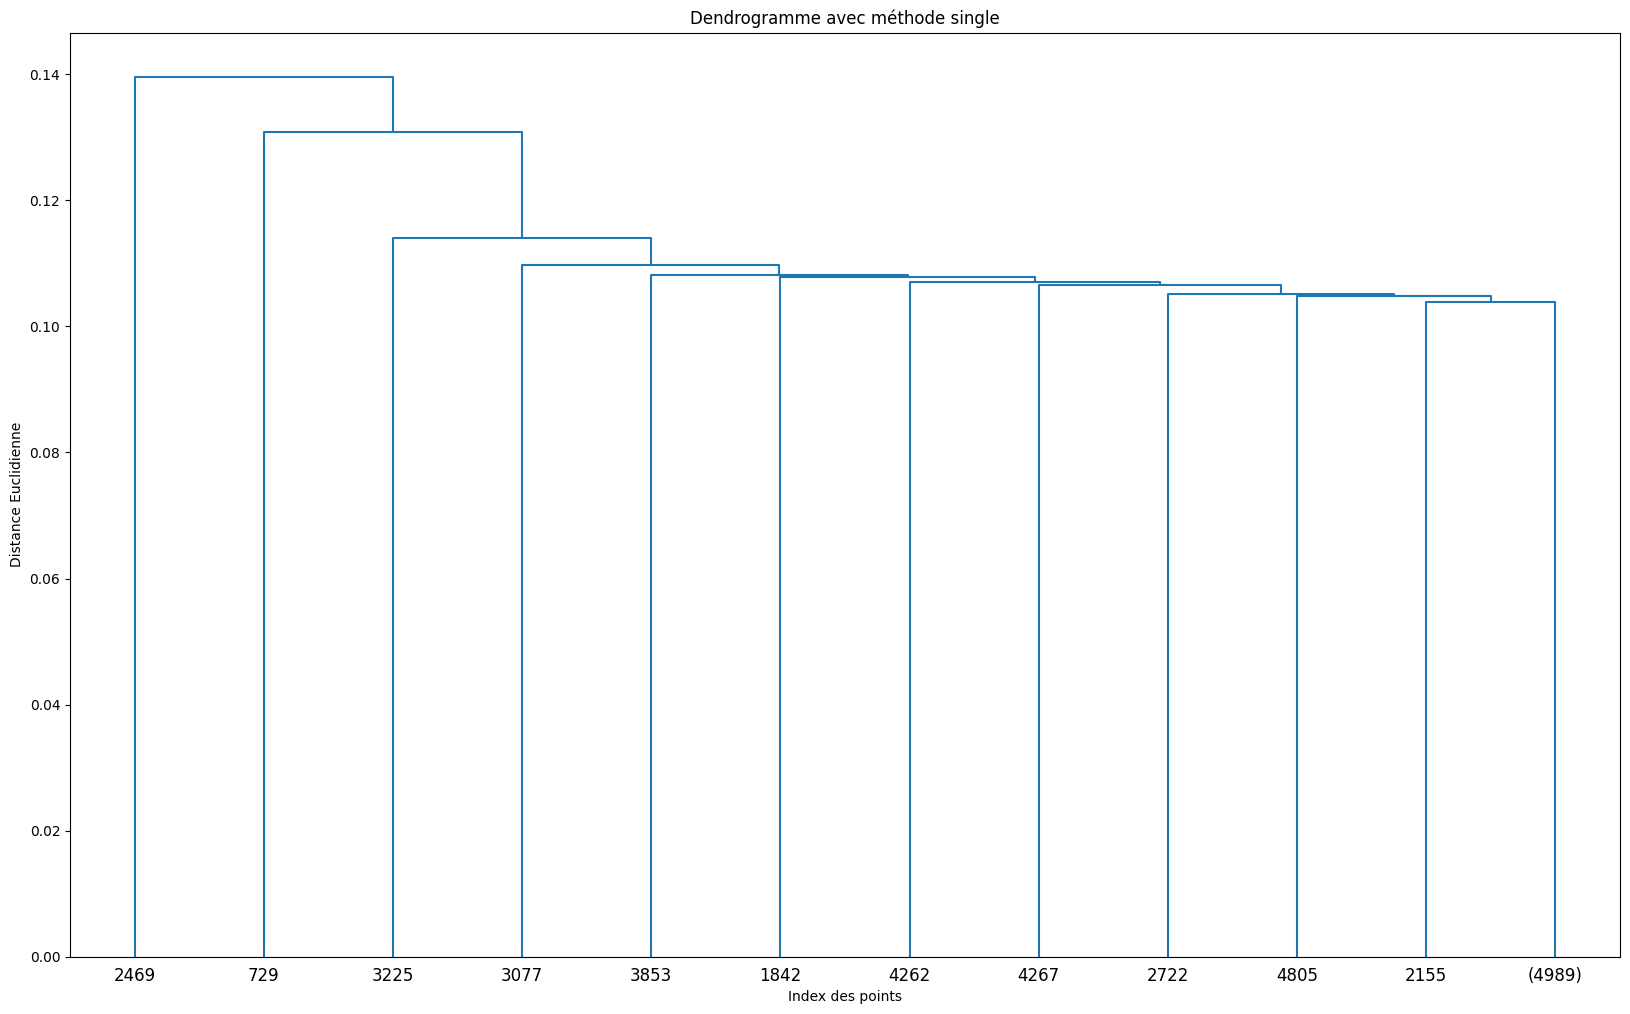

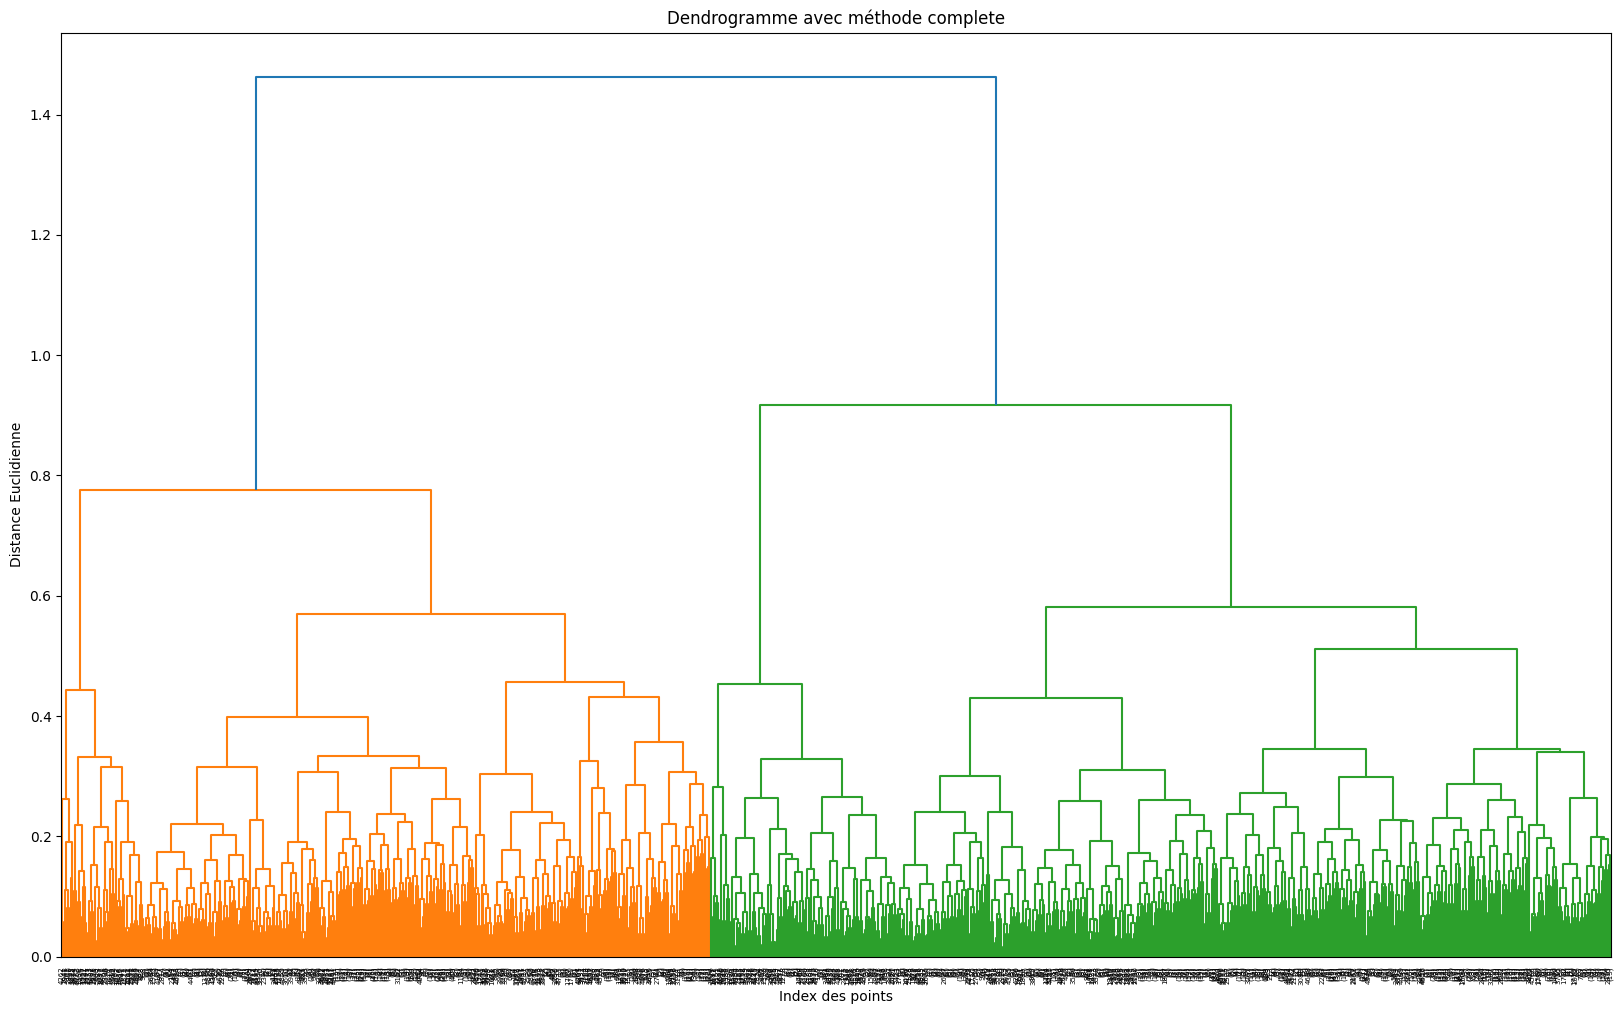

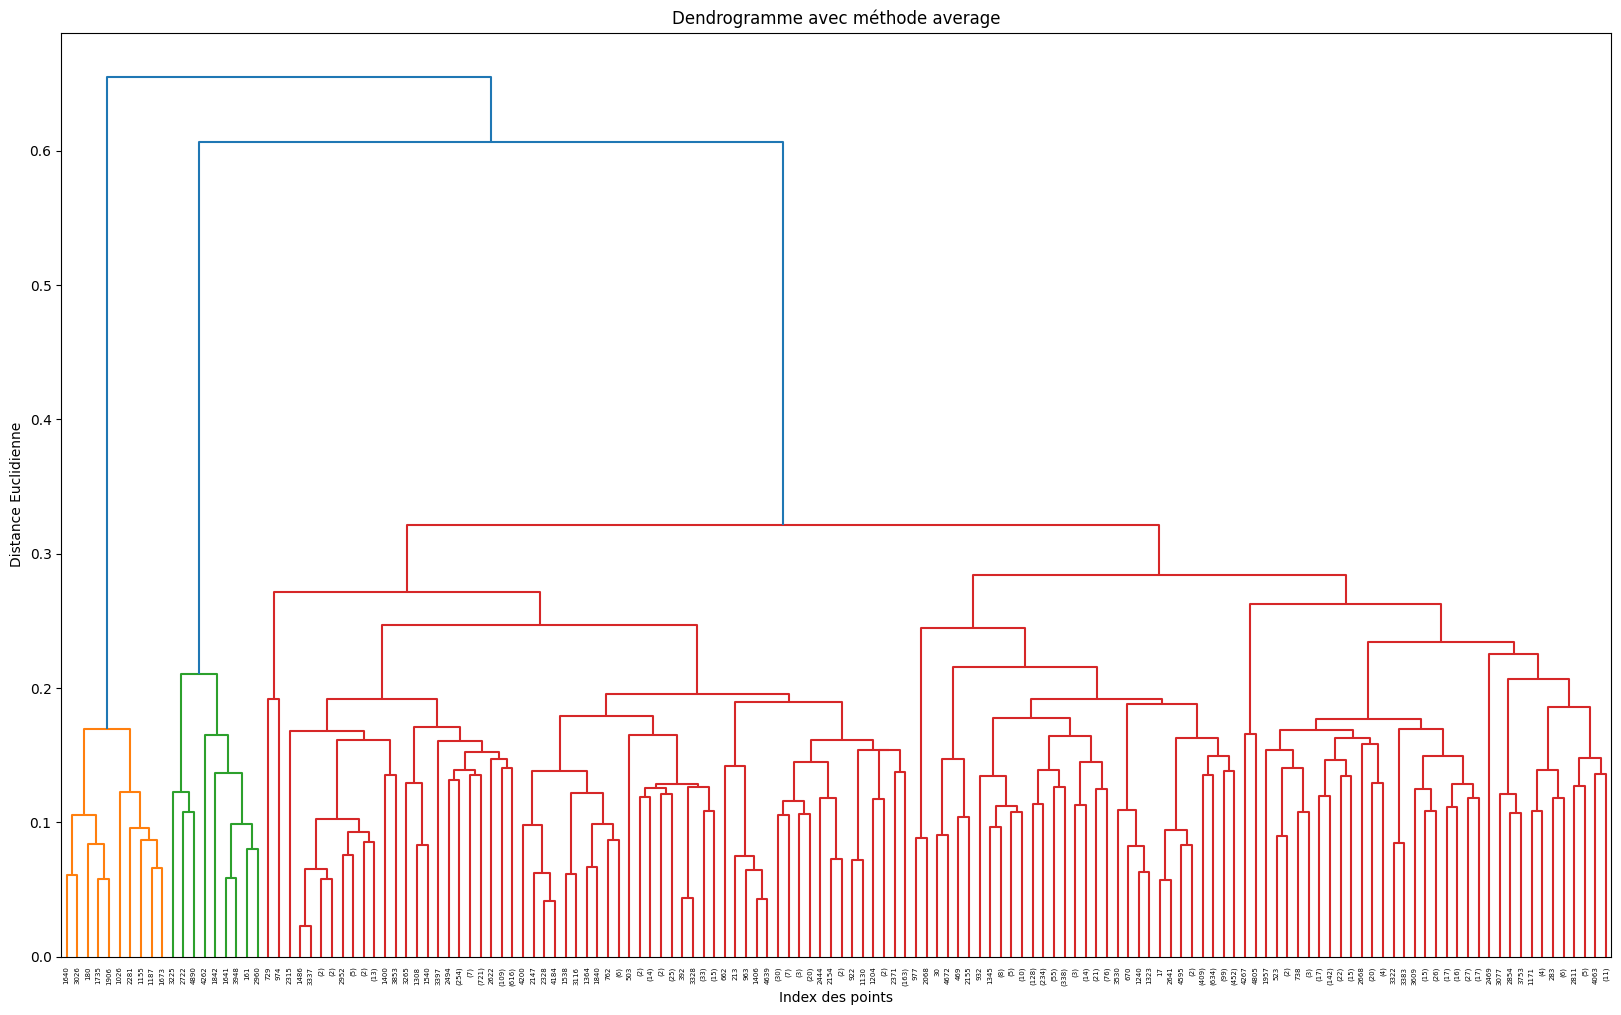

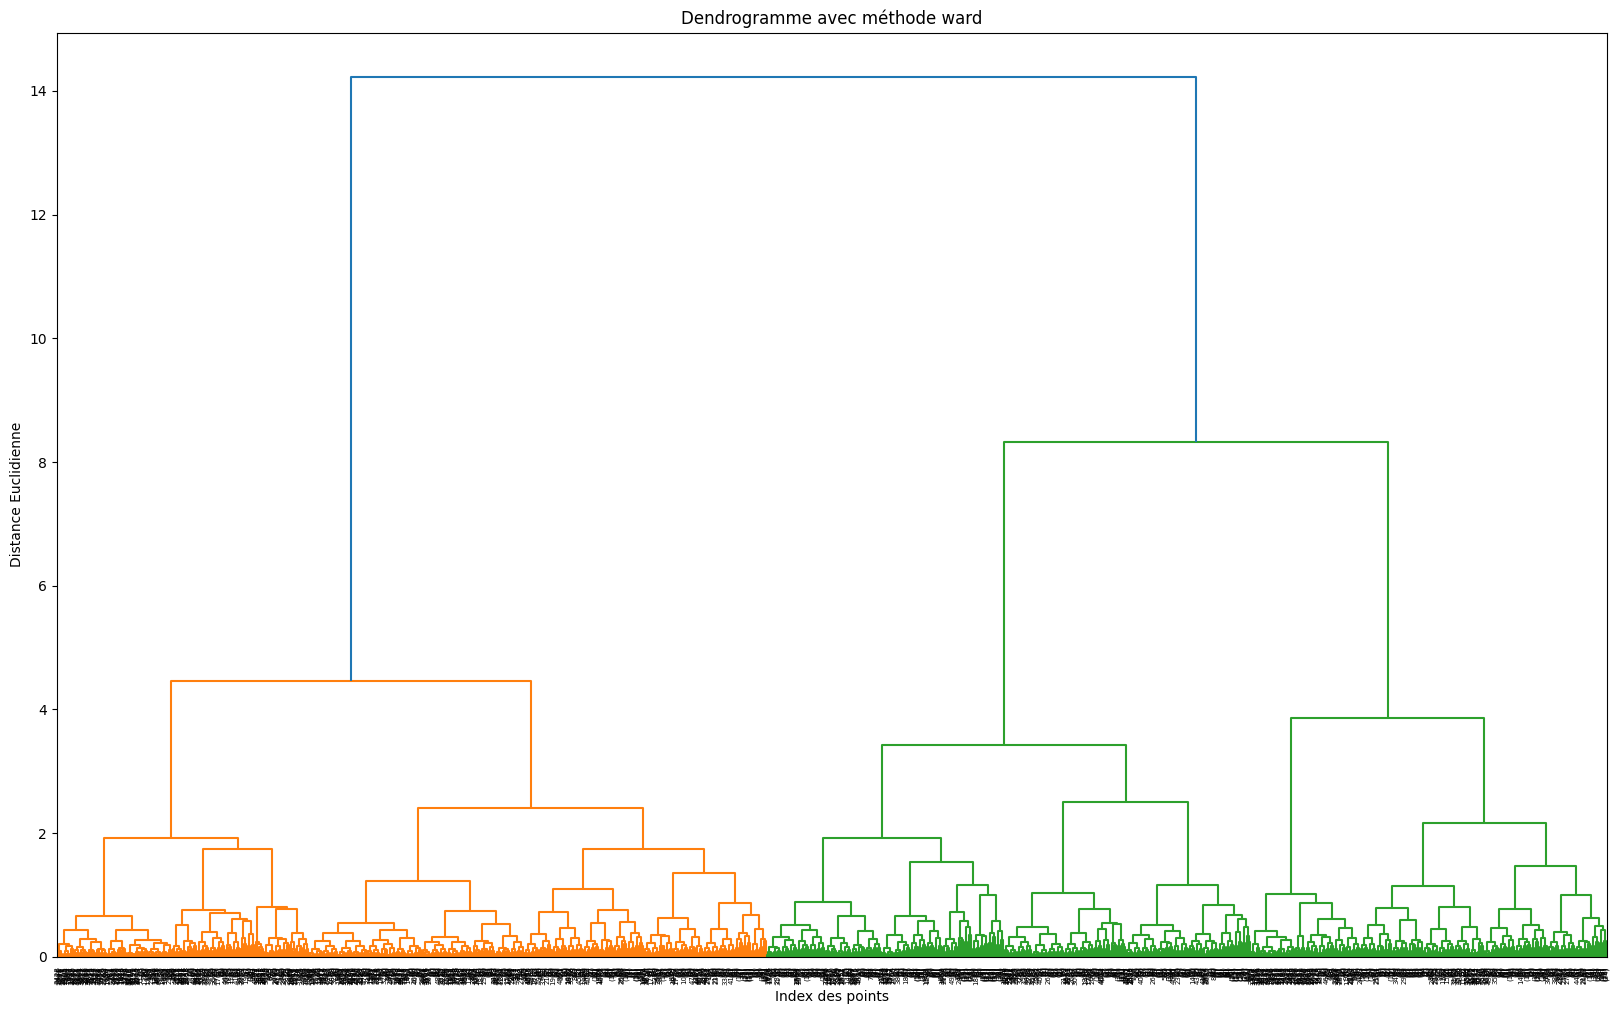

In [6]:
# Importation des biblioth√®ques n√©cessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, pairwise_distances
from scipy.spatial.distance import pdist
import sys # import sys to adjust recursion limit


# Cr√©er le clustering hi√©rarchique
linkage_methods = ['single', 'complete', 'average', 'ward']  # Types de liaisons

for method in linkage_methods:
    Z = linkage(features, method=method, metric='euclidean')

    # Increase recursion limit
    sys.setrecursionlimit(5000)  # Adjust as needed

    # Tra√ßage du dendrogramme
    # Use 'truncate_mode' to simplify the dendrogram
    plt.figure(figsize=(20, 12))
    dendrogram(Z, truncate_mode='level', p=10) # 'level' and 'p' to control the size of the dendrogram
    plt.title(f"Dendrogramme avec m√©thode {method}")
    plt.xlabel("Index des points")
    plt.ylabel("Distance Euclidienne")
    plt.show()


In [9]:
# Tester diff√©rents seuils
thresholds = [5, 10, 15, 20]  # Choisir des seuils bas√©s sur les distances dans les dendrogrammes
for method in linkage_methods:
    Z = linkage(features, method=method, metric='euclidean')
    for thresh in thresholds:
        clusters = fcluster(Z, t=thresh, criterion='distance')

        # Check if we have more than 1 cluster
        if len(set(clusters)) > 1:
            # √âvaluation avec le score de silhouette
            silhouette_avg = silhouette_score(features, clusters, metric='euclidean')
            print(f"M√©thode: {method}, Seuil: {thresh}, Nombre de clusters: {len(set(clusters))}, Silhouette: {silhouette_avg:.3f}")
        else:
            print(f"M√©thode: {method}, Seuil: {thresh}, resulted in only one cluster. Skipping silhouette calculation.")

M√©thode: single, Seuil: 5, resulted in only one cluster. Skipping silhouette calculation.
M√©thode: single, Seuil: 10, resulted in only one cluster. Skipping silhouette calculation.
M√©thode: single, Seuil: 15, resulted in only one cluster. Skipping silhouette calculation.
M√©thode: single, Seuil: 20, resulted in only one cluster. Skipping silhouette calculation.
M√©thode: complete, Seuil: 5, resulted in only one cluster. Skipping silhouette calculation.
M√©thode: complete, Seuil: 10, resulted in only one cluster. Skipping silhouette calculation.
M√©thode: complete, Seuil: 15, resulted in only one cluster. Skipping silhouette calculation.
M√©thode: complete, Seuil: 20, resulted in only one cluster. Skipping silhouette calculation.
M√©thode: average, Seuil: 5, resulted in only one cluster. Skipping silhouette calculation.
M√©thode: average, Seuil: 10, resulted in only one cluster. Skipping silhouette calculation.
M√©thode: average, Seuil: 15, resulted in only one cluster. Skipping silh

Voici une interpr√©tation des r√©sultats obtenus :

---

### 1. **M√©thode "single"**
- Pour les seuils 5, 10, 15 et 20, **il n'y a qu'un seul cluster**.
- Cela signifie que la m√©thode "single" (liaison simple) n'est pas efficace pour vos donn√©es √† ces seuils. Elle regroupe rapidement tous les points dans un seul cluster, m√™me √† de faibles seuils.
- La liaison simple est connue pour √™tre sensible aux points proches, ce qui explique cette tendance √† cr√©er un seul cluster.

---

### 2. **M√©thode "complete"**
- R√©sultats similaires √† la m√©thode "single" : pour tous les seuils (5, 10, 15, 20), **un seul cluster est form√©**.
- La m√©thode "complete" (liaison compl√®te) semble √©galement regrouper rapidement les donn√©es en un seul cluster √† ces seuils.

---

### 3. **M√©thode "average"**
- Comme pour "single" et "complete", **un seul cluster** est form√© pour tous les seuils test√©s.
- La m√©thode "average" (liaison moyenne) est un compromis entre "single" et "complete", mais dans ce cas, elle pr√©sente un comportement similaire.

---

### 4. **M√©thode "ward"**
- **Seuil 5 :**
  - **Nombre de clusters : 3**
  - **Score de silhouette : 0.309**
  - Cela indique qu'√† ce seuil, 3 groupes bien distincts sont form√©s, mais le score de silhouette (0.309) sugg√®re une s√©paration mod√©r√©e entre les clusters.
  
- **Seuil 10 :**
  - **Nombre de clusters : 2**
  - **Score de silhouette : 0.399**
  - √Ä ce seuil, deux clusters sont form√©s avec une meilleure s√©paration (score de silhouette plus √©lev√©). Cela pourrait indiquer une structure naturelle √† deux groupes dans les donn√©es.

- **Seuil 15 et 20 :**
  - **Un seul cluster** est form√©, ce qui signifie que le seuil est trop √©lev√© pour capturer des sous-groupes.

---

### 5. **Interpr√©tation globale**
- Les m√©thodes "single", "complete" et "average" ne donnent pas de r√©sultats exploitables √† ces seuils car elles forment un seul cluster. Cela pourrait √™tre d√ª √† des seuils mal ajust√©s ou √† une structure particuli√®re dans vos donn√©es.
  
- La m√©thode **"ward"** produit des clusters significatifs :
  - √Ä un seuil de **5**, elle identifie **3 clusters**, ce qui semble prometteur pour r√©pondre √† la question sur la formation de 3 groupes naturels.
  - √Ä un seuil de **10**, elle identifie **2 clusters** avec une meilleure coh√©rence (silhouette = 0.399).

- Les r√©sultats sugg√®rent que **la m√©thode "ward" est la plus adapt√©e √† vos donn√©es**, et que vous pourriez ajuster les seuils autour de **5** pour explorer plus en d√©tail la structure en 3 clusters.

---

### 6. **Prochaines √©tapes**
1. **Analyser les clusters de la m√©thode "ward" :**
   - Visualisez les donn√©es en fonction des clusters obtenus.
   - V√©rifiez si les clusters correspondent √† des groupes logiques ou des patterns dans vos donn√©es.

2. **Ajuster les seuils pour les autres m√©thodes :**
   - Testez des seuils plus bas pour "single", "complete" et "average" (par exemple, 1, 2, 3) pour voir si des clusters significatifs apparaissent.

3. **Explorer les scores de silhouette :**
   - Essayez de maximiser le score de silhouette pour ajuster le nombre et la qualit√© des clusters.

Souhaitez-vous que je vous aide √† visualiser les clusters ou √† ajuster les seuils pour d'autres m√©thodes ? üòä

In [10]:
# Identifier un seuil qui donne 3 clusters naturellement
for method in linkage_methods:
    Z = linkage(features, method=method, metric='euclidean')
    clusters = fcluster(Z, t=15, criterion='distance')  # Ajuster ce seuil selon vos observations

    if len(set(clusters)) == 3:
        print(f"Trois groupes trouv√©s avec m√©thode {method}")
        # Tracer les groupes dans un espace 2D (PCA ou r√©duction de dimension)
        plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=clusters, cmap='rainbow')
        plt.title(f"Clusters obtenus avec m√©thode {method} (3 groupes)")
        plt.show()
